In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
alunos = pd.read_excel('Aprovacao_alunos.xlsx')
alunos.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


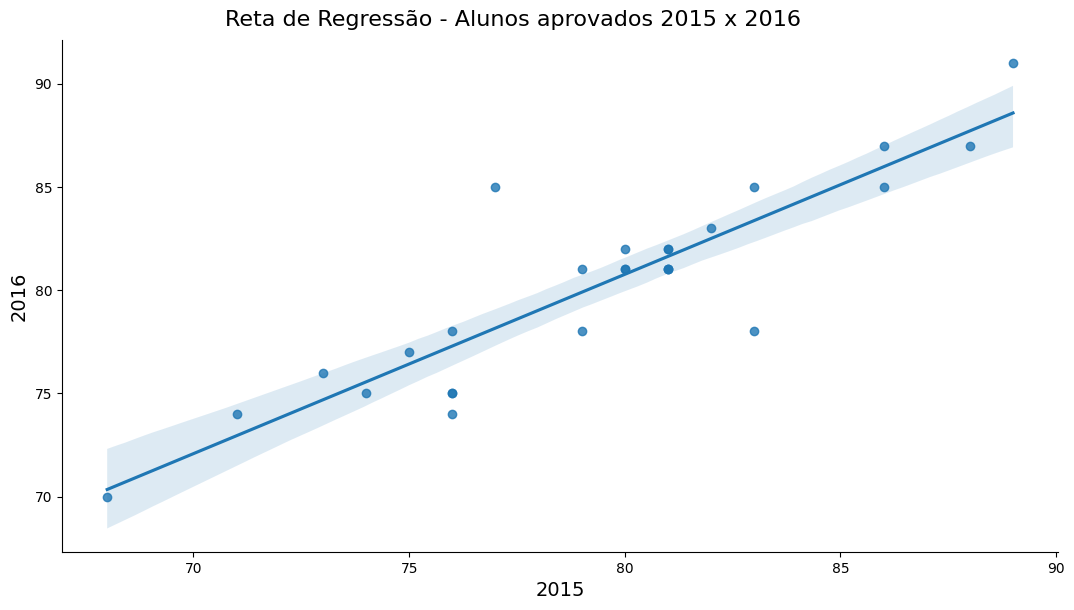

In [33]:
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=alunos)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Alunos aprovados 2015 x 2016', fontsize=16, y=1.02)
ax.set_xlabels("2015", fontsize=14)
ax.set_ylabels("2016", fontsize=14)
ax

In [36]:
alunos_corr = alunos.drop('UF', axis=1)	
alunos_corr.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [15]:
import statsmodels.api as sm

In [37]:
Y = alunos.ano_2016
X = sm.add_constant(alunos.ano_2015)

In [38]:
Y.head()

0    85
1    81
2    85
3    82
4    76
Name: ano_2016, dtype: int64

In [39]:
resultado_regressao = sm.OLS(Y, X).fit()

In [19]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           3.02e-10
Time:                        15:07:25   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [40]:
alunos['ano_2017 predito'] = resultado_regressao.predict()
alunos

,UF,ano_2015,ano_2016,ano_2017 predito
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089
5,Amapa,76,75,77.291450
6,Tocantins,81,82,81.632053
7,Maranhao,81,81,81.632053
8,Piaui,80,81,80.763932
9,Ceara,86,85,85.972655


In [44]:
alunos["residuo"] = alunos["ano_2017 predito"] - alunos["ano_2016"]
alunos.head()

,UF,ano_2015,ano_2016,ano_2017 predito,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
